In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go 

import plotly.offline as py
import plotly.express as px 
import plotly.offline as pyo 

In [ ]:


!pip install pywaffle --quiet
from pywaffle import Waffle



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 70.3 MB/s eta 0:00:00


In [ ]:
data=pd.read_csv("visceral_fat.csv")
data.tail()

,number,age (years),ethnicity,diabetes mellitus,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational age at birth,type of delivery,child birth weight (g),gestational dm
128,278,21,0.0,0,74.5,128.5,13.90,"10,4",2.0,81.0,21.22,"38,3",0,3775,0
129,280,22,0.0,0,84.0,125.0,69.05,"7,5",2.0,114.0,36.64,"37,3",1,3565,1
130,283,19,1.0,0,76.0,140.5,52.50,"20,0",2.0,88.0,23.62,"40,3",1,3260,0
131,285,23,1.0,0,83.5,122.5,31.45,"10,5",1.0,NaN,28.76,"40,6",1,3270,0
132,287,36,0.0,0,92.0,156.5,42.50,"8,5",4.0,NaN,44.43,"40,4",0,4226,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   number                         133 non-null    int64  
 1   age (years)                    133 non-null    int64  
 2   ethnicity                      132 non-null    float64
 3   diabetes mellitus              133 non-null    int64  
 4   mean diastolic bp (mmhg)       133 non-null    float64
 5   mean systolic bp (mmhg)        133 non-null    float64
 6   central armellini fat (mm)     133 non-null    float64
 7   current gestational age        133 non-null    object 
 8   pregnancies (number)           128 non-null    float64
 9   first fasting glucose (mg/dl)  103 non-null    float64
 10  bmi pregestational (kg/m)      132 non-null    float64
 11  gestational age at birth       133 non-null    object 
 12  type of delivery               133 non-null    int

In [ ]:
data.isnull().sum()

number                            0
age (years)                       0
ethnicity                         1
diabetes mellitus                 0
mean diastolic bp (mmhg)          0
mean systolic bp (mmhg)           0
central armellini fat (mm)        0
current gestational age           0
pregnancies (number)              5
first fasting glucose (mg/dl)    30
bmi pregestational (kg/m)         1
gestational age at birth          0
type of delivery                  0
child birth weight (g)            0
gestational dm                    0
dtype: int64

In [ ]:
data.fillna(value=0,inplace=True)

In [ ]:
data['current gestational age']=data['current gestational age'].str.replace(',', '')
data['current gestational age'] = pd.to_numeric(data['current gestational age'], errors = 'coerce')

data['gestational age at birth']=data['gestational age at birth'].str.replace(',', '')
data['gestational age at birth'] = pd.to_numeric(data['gestational age at birth'], errors = 'coerce')

In [ ]:
data["current gestational age"]=data["current gestational age"].apply(int)
data["gestational age at birth"]=data["gestational age at birth"].apply(int)

In [ ]:
data.describe()

,number,age (years),ethnicity,diabetes mellitus,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational age at birth,type of delivery,child birth weight (g),gestational dm,is_outlier
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,161.248120,25.804511,0.436090,0.007519,70.593985,116.578947,44.230827,154.112782,2.263158,62.940602,27.661579,390.105263,0.240602,3257.563910,0.135338,0.984962
std,82.703505,6.366887,0.497774,0.086711,8.657662,13.879602,14.606195,38.177348,1.714001,35.089792,7.262105,19.504569,0.429065,490.318578,0.343378,0.173422
min,1.000000,15.000000,0.000000,0.000000,51.500000,90.000000,12.700000,62.000000,0.000000,0.000000,0.000000,271.000000,0.000000,1105.000000,0.000000,-1.000000
25%,78.000000,21.000000,0.000000,0.000000,64.500000,107.000000,34.600000,130.000000,1.000000,64.000000,22.400000,383.000000,0.000000,2944.000000,0.000000,1.000000
50%,187.000000,25.000000,0.000000,0.000000,70.000000,114.000000,42.500000,162.000000,2.000000,78.000000,26.220000,394.000000,0.000000,3220.000000,0.000000,1.000000
75%,228.000000,30.000000,1.000000,0.000000,75.500000,125.000000,52.700000,181.000000,3.000000,85.000000,30.850000,403.000000,0.000000,3610.000000,0.000000,1.000000
max,287.000000,43.000000,1.000000,1.000000,100.500000,167.000000,94.400000,315.000000,9.000000,114.000000,55.360000,411.000000,1.000000,4534.000000,1.000000,1.000000


<Axes: >

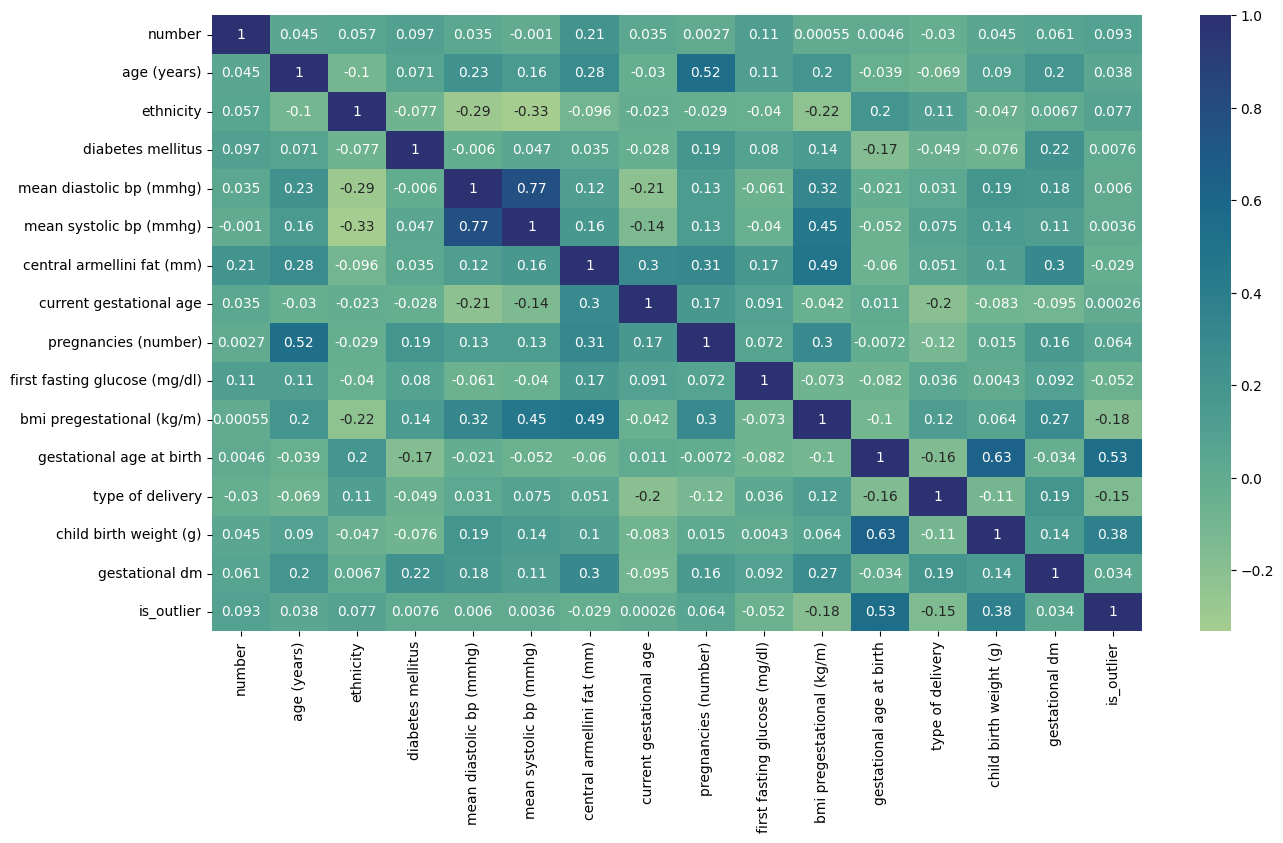

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True, cmap="crest")

In [ ]:
from sklearn.ensemble import IsolationForest
isoforest=IsolationForest(n_estimators=100,contamination=0.001)
isoforest.fit(data)
outliers = isoforest.predict(data)
data['is_outlier'] = outliers
# Print the number of outliers
print('Number of outliers detected:', sum(outliers == -1))

Number of outliers detected: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



<ipython-input-35-9bae1ed80cfd>:6: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

<ipython-input-35-9bae1ed80cfd>:6: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

<ipython-input-35-9bae1ed80cfd>:6: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

<ipython-input-35-9bae1ed80cfd>:6: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

<ipython-input-35-9bae1ed80cfd>:6: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

<ipython-input-35-9bae1ed80cfd>:6: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

<ipython-input-35-9bae1ed80cfd>:6: UserWarning:

Dataset has 0 variance; skipping 

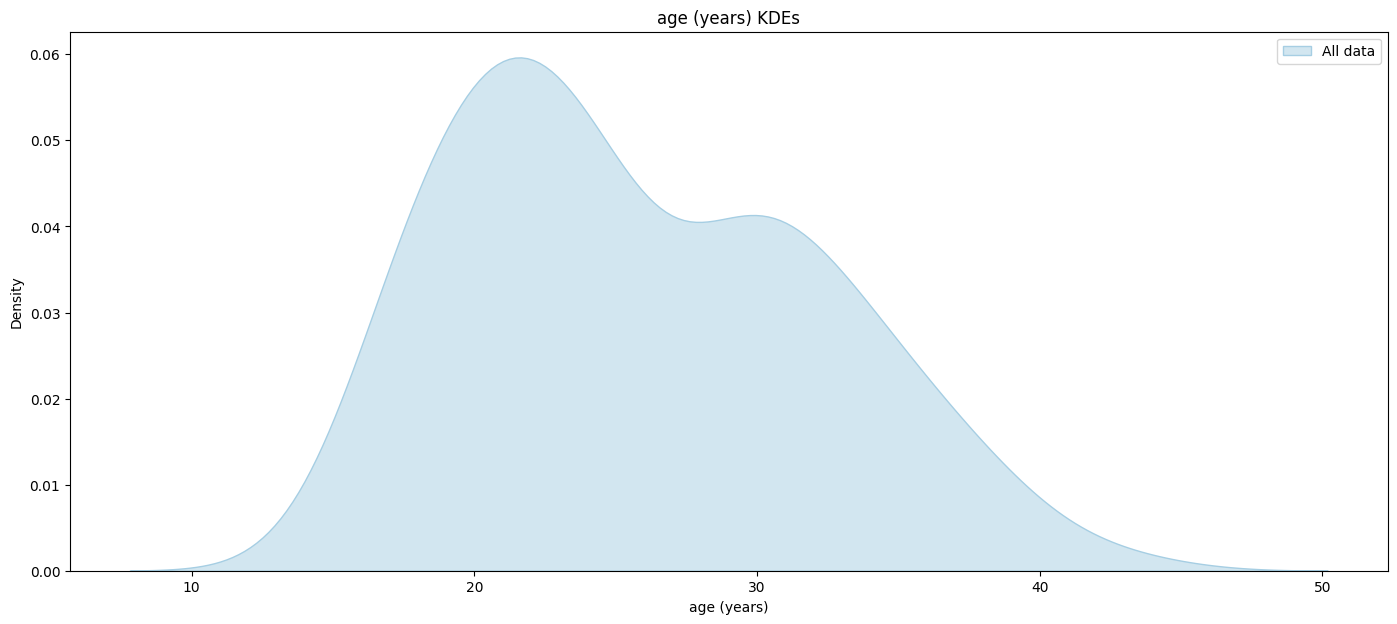

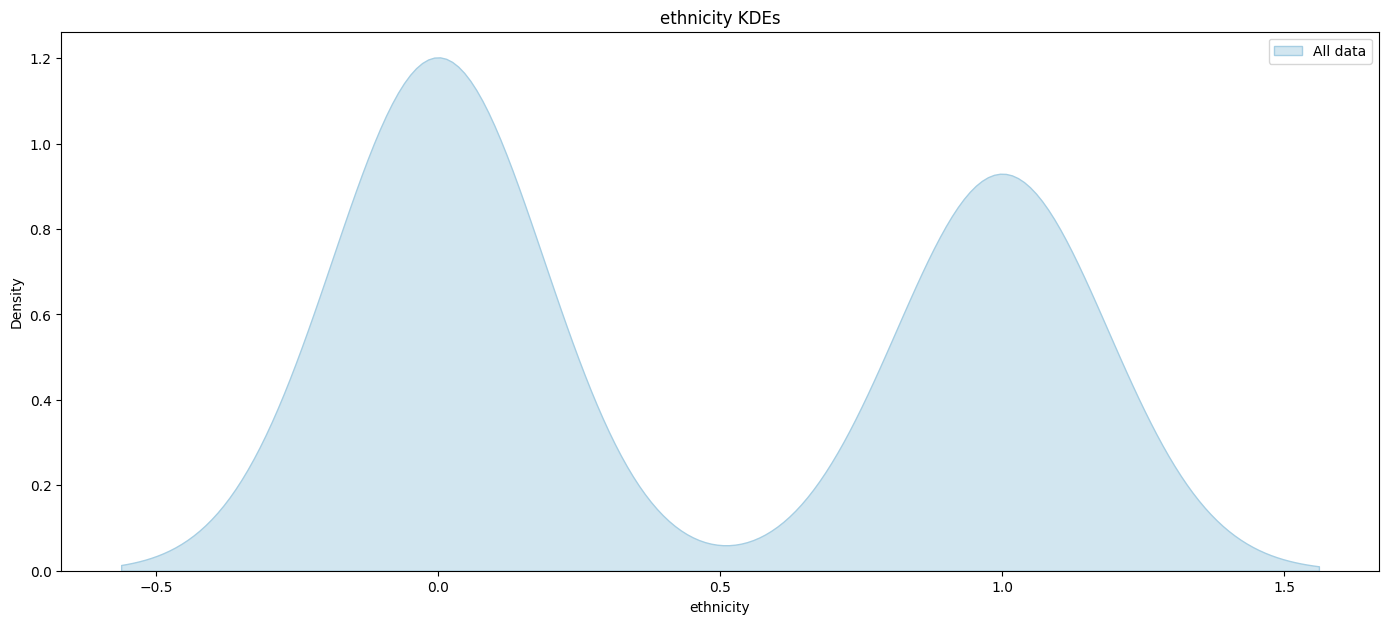

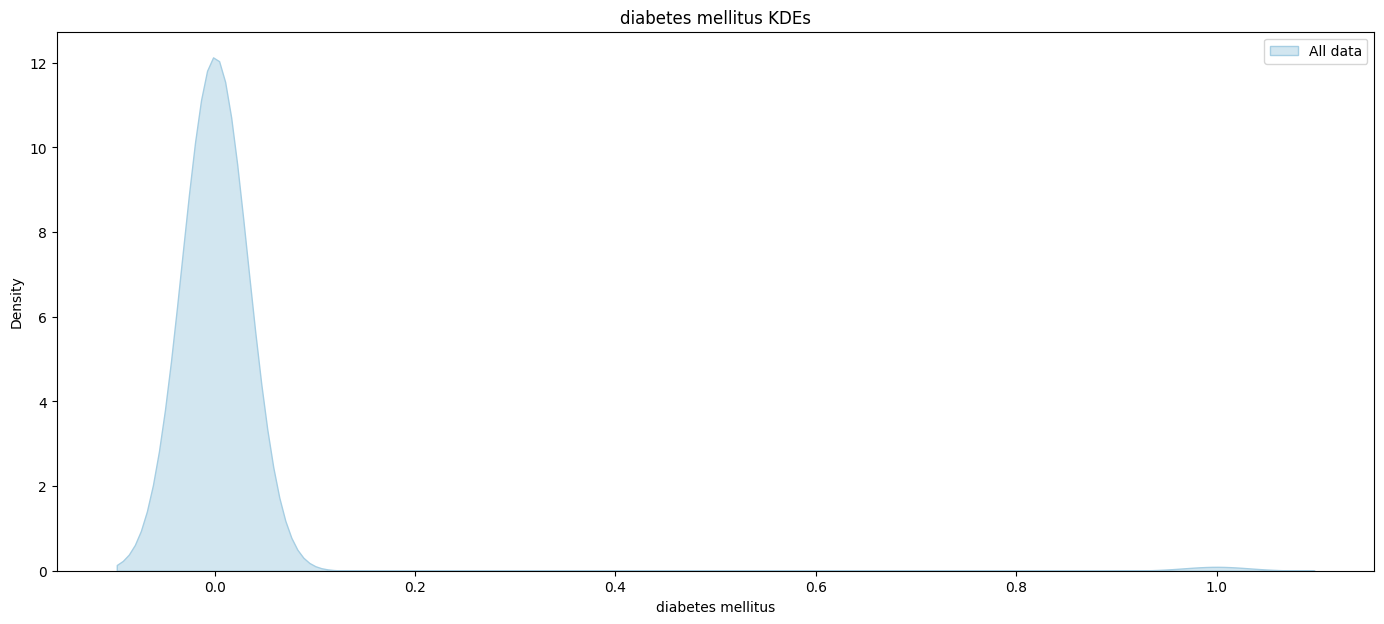

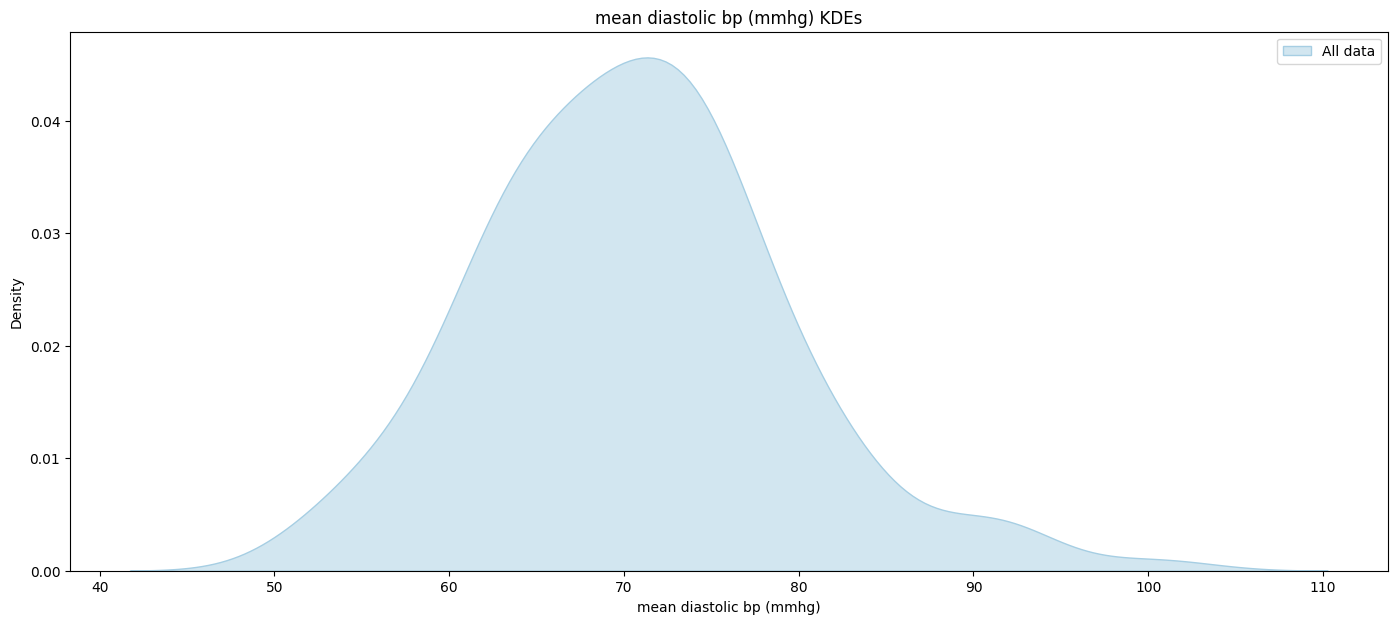

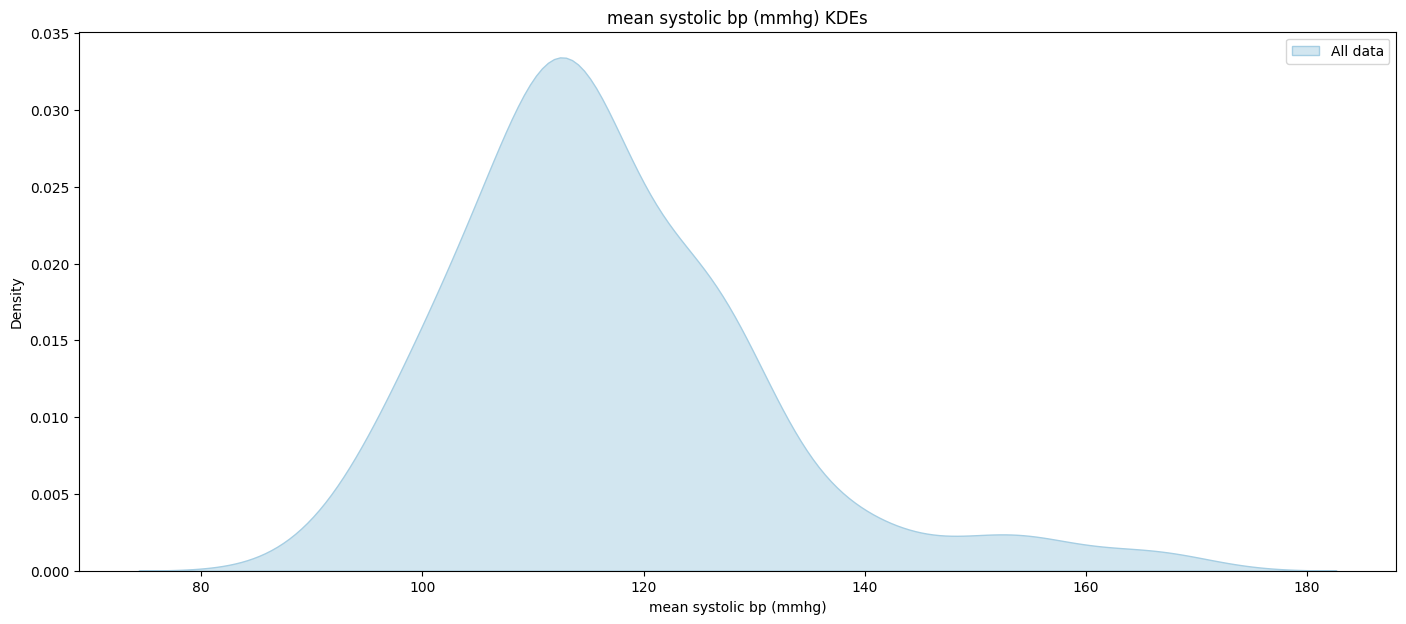

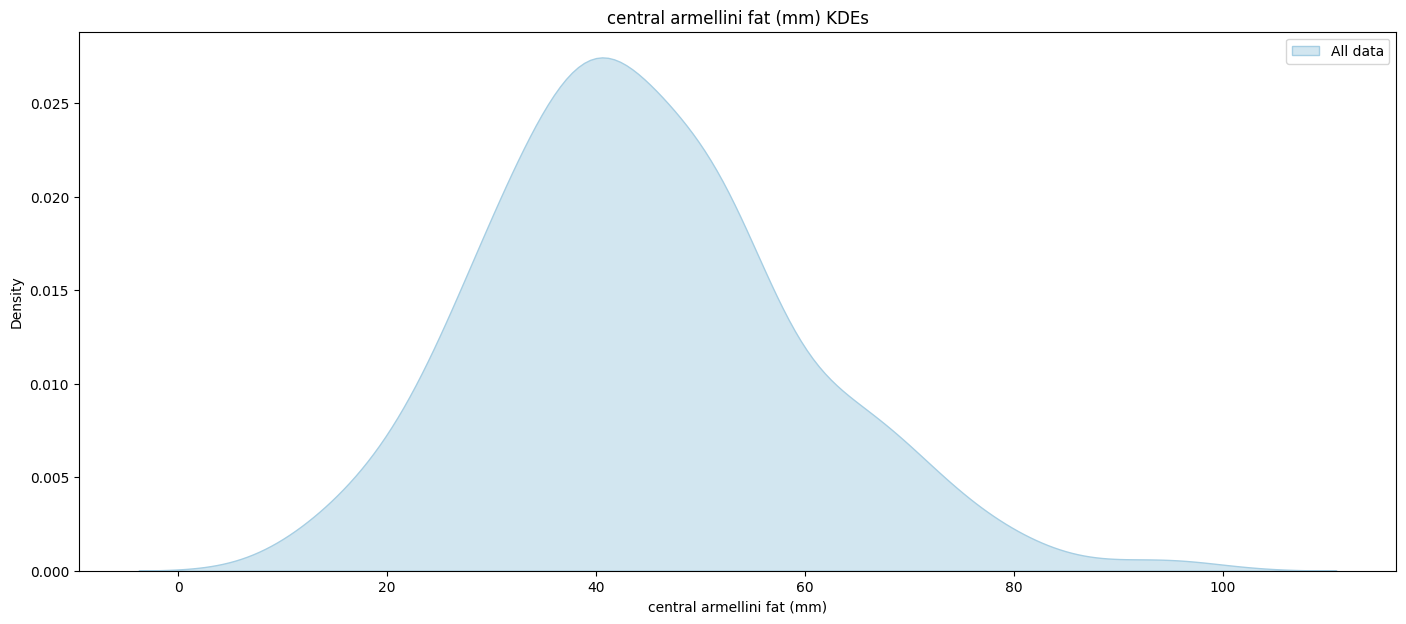

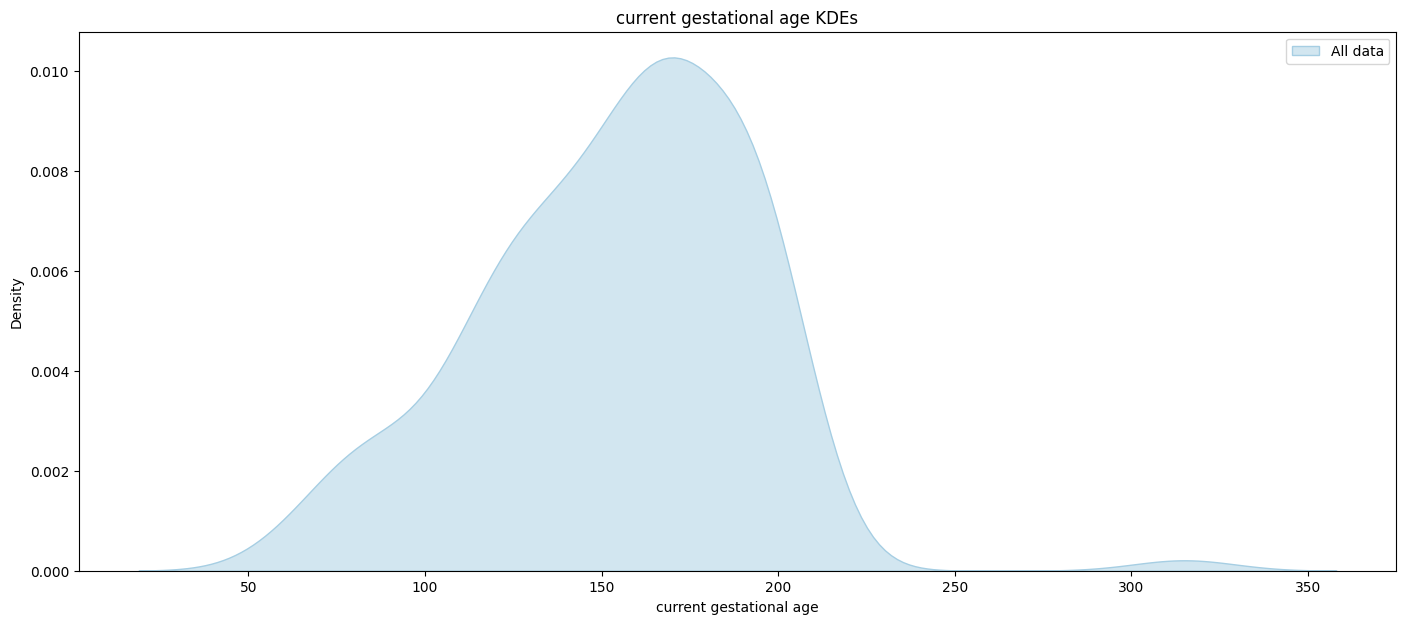

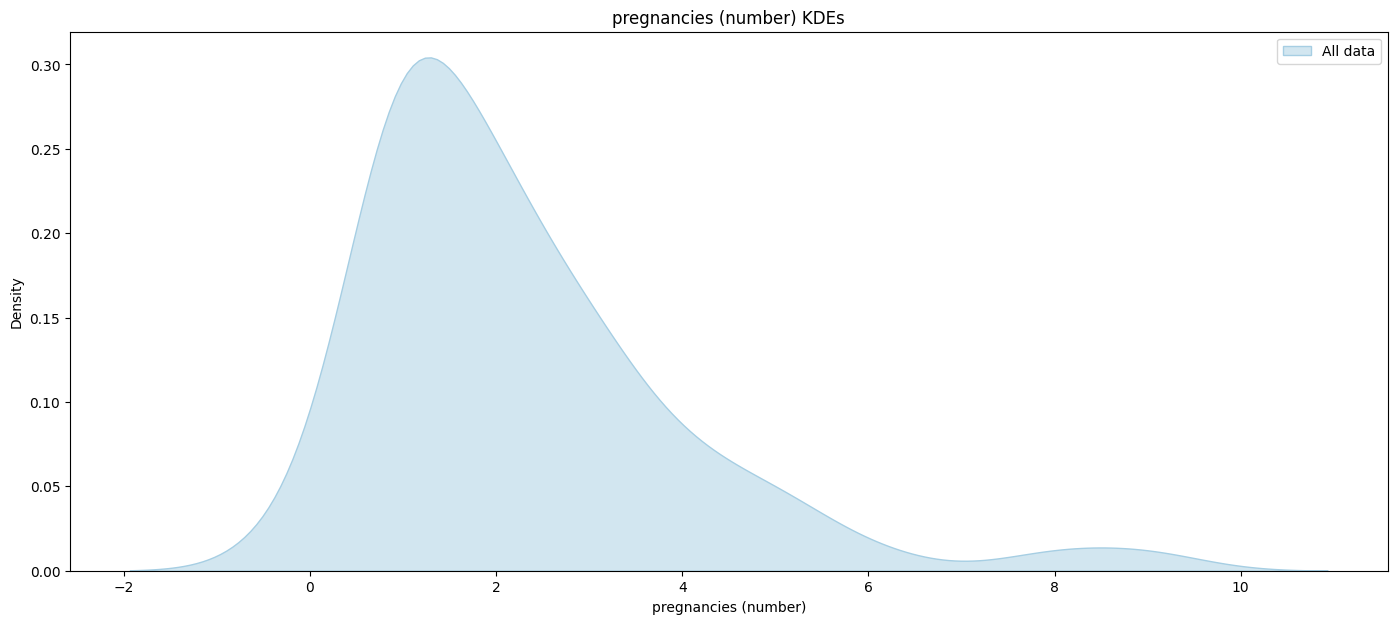

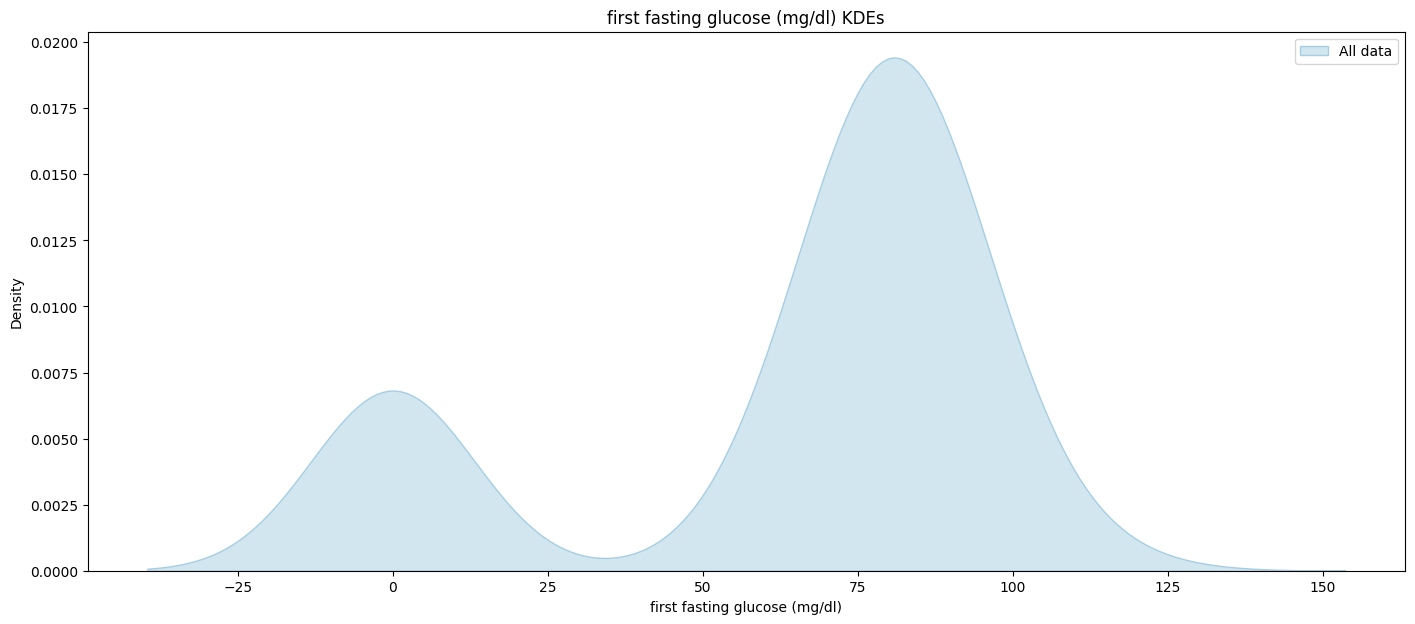

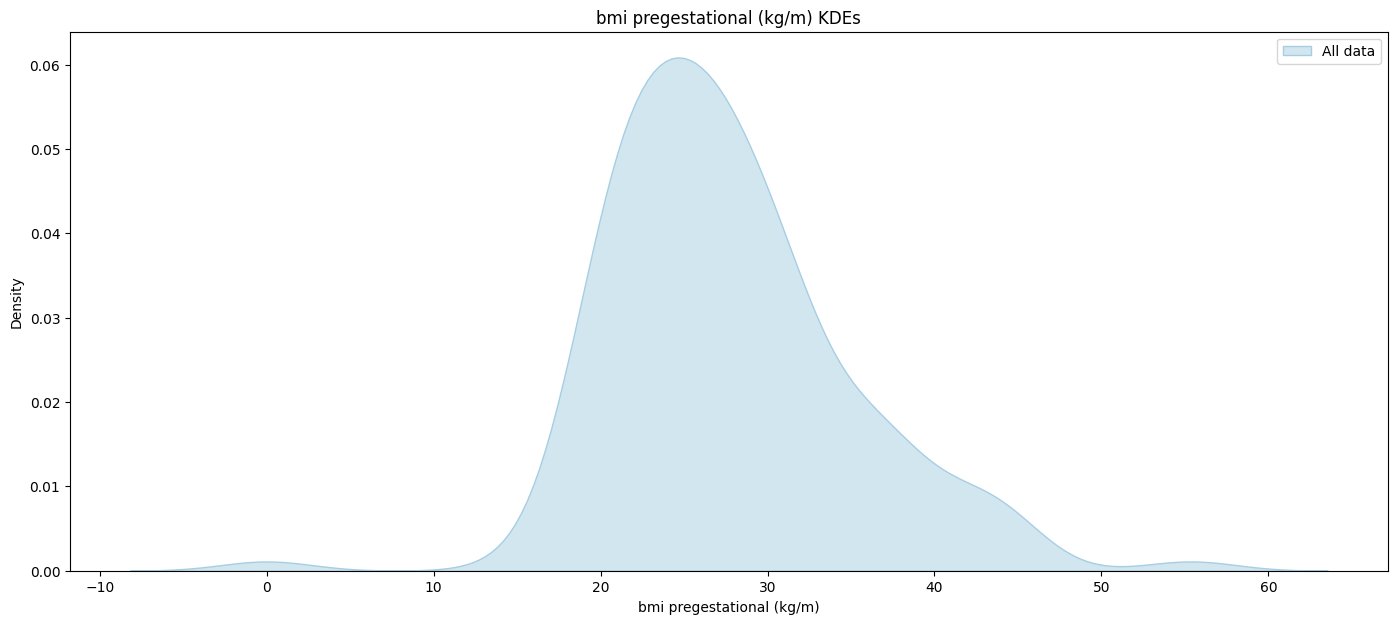

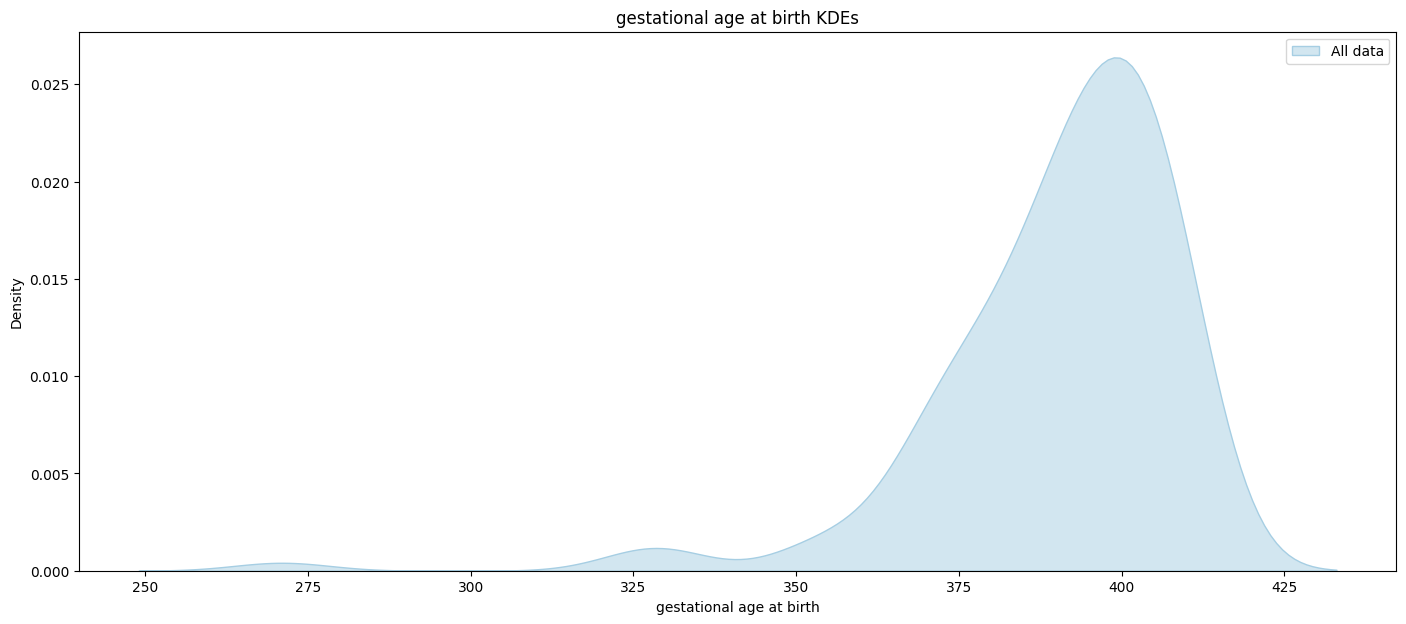

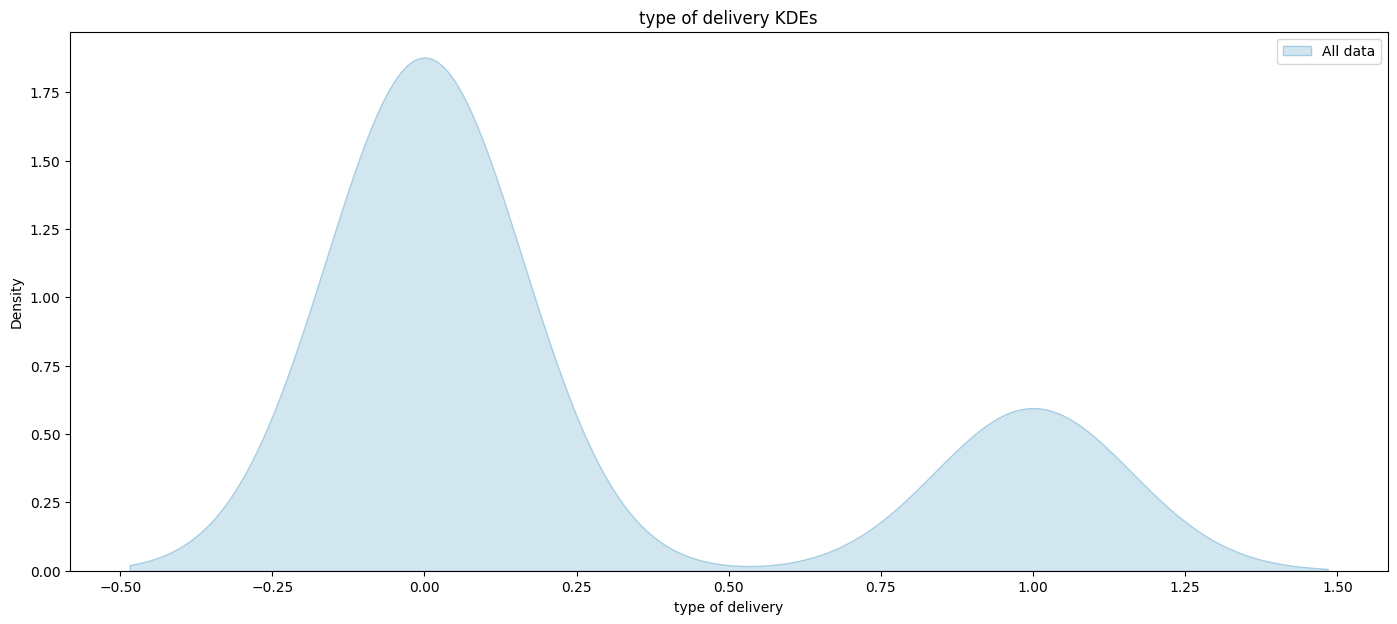

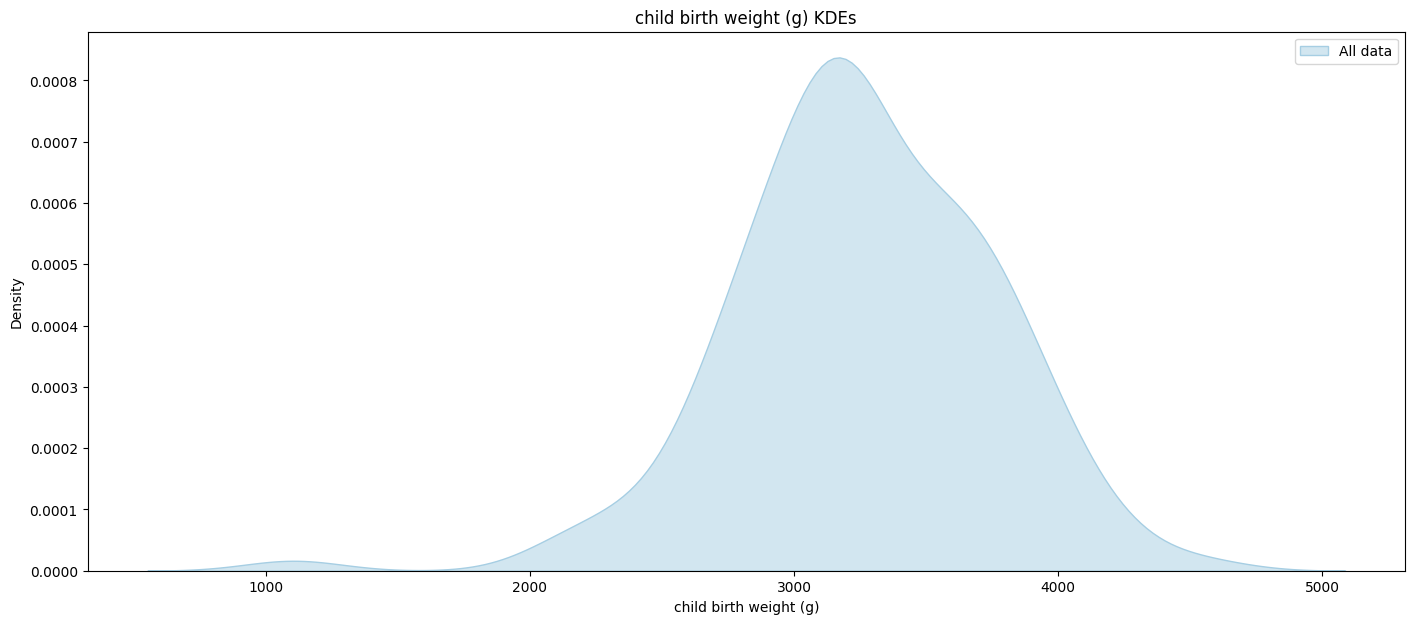

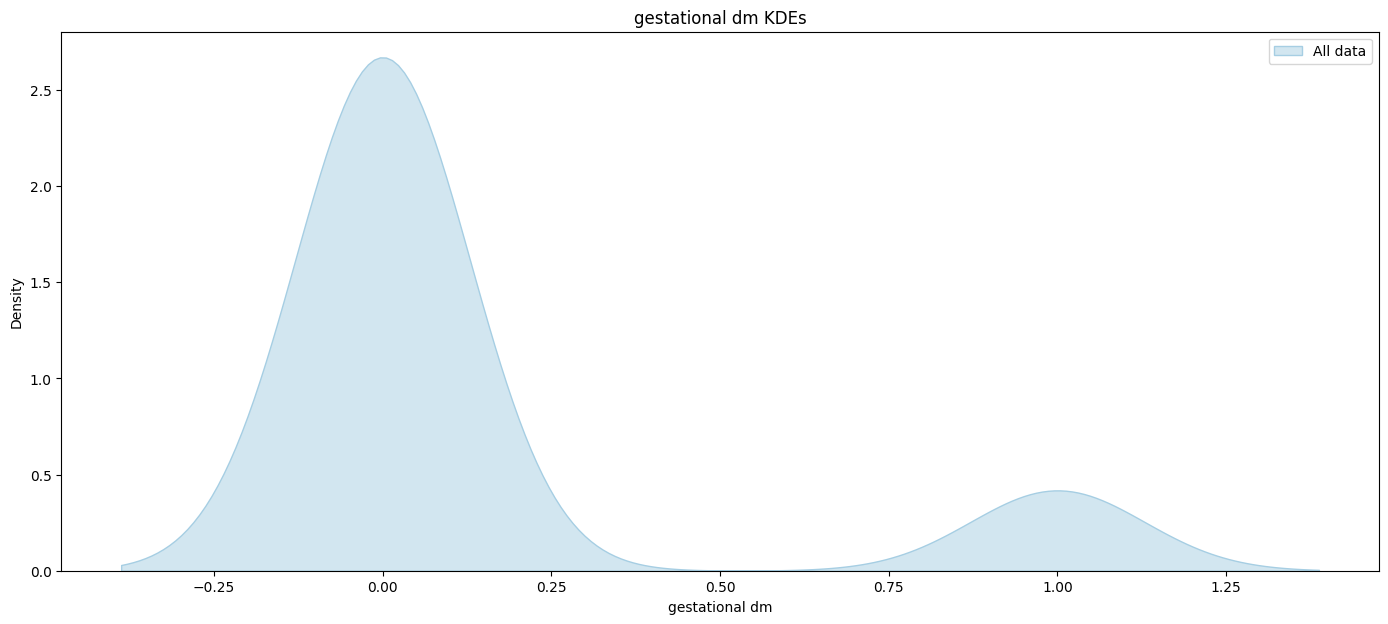

In [ ]:
for col in data.columns:
    if col not in ['number','is_outlier']: #Number is id
        plt.figure(figsize=(17,7))
        sns.set_palette("Paired")
        sns.kdeplot(data[col], label='All data', fill=True,alpha=0.5)
        sns.kdeplot(data[data['is_outlier'] == -1][col], label='outliers', fill=True,alpha=0.5)
        plt.title(f'{col} KDEs')
        plt.legend(loc ='upper right')
plt.show();

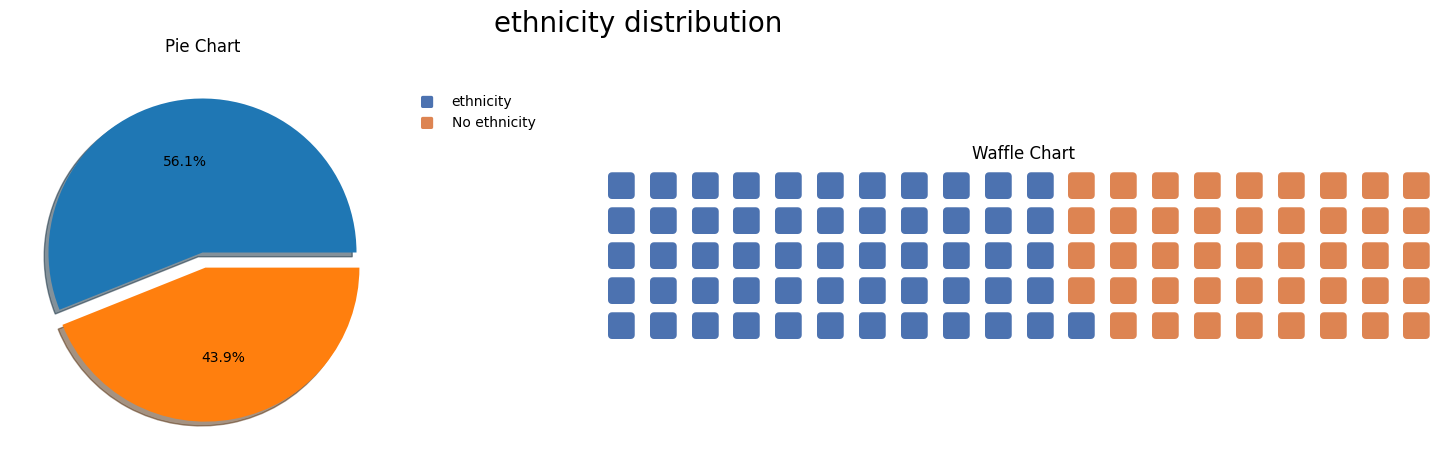

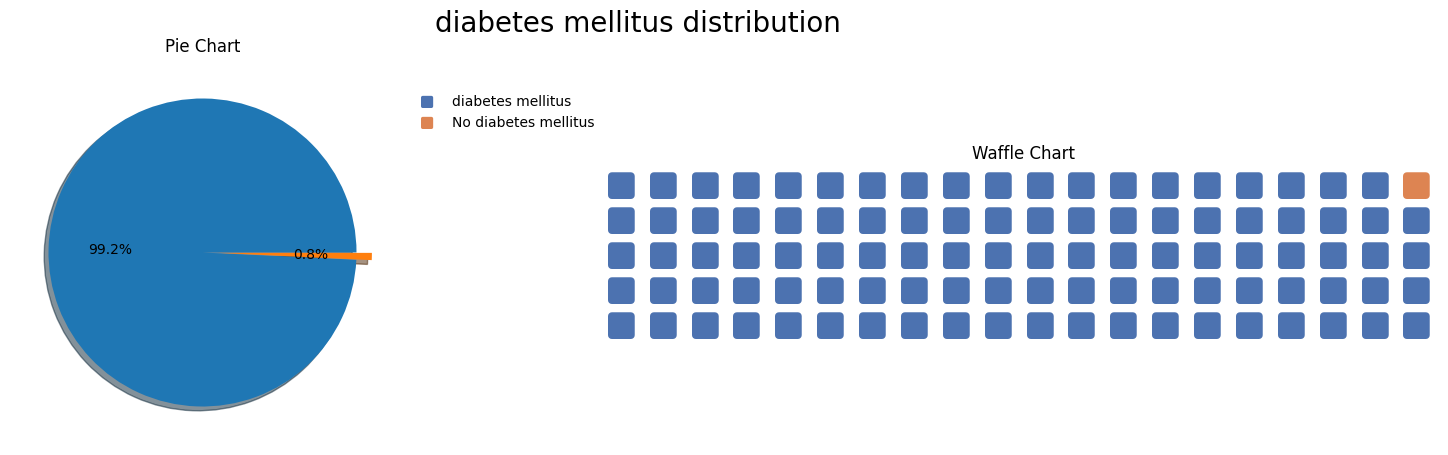

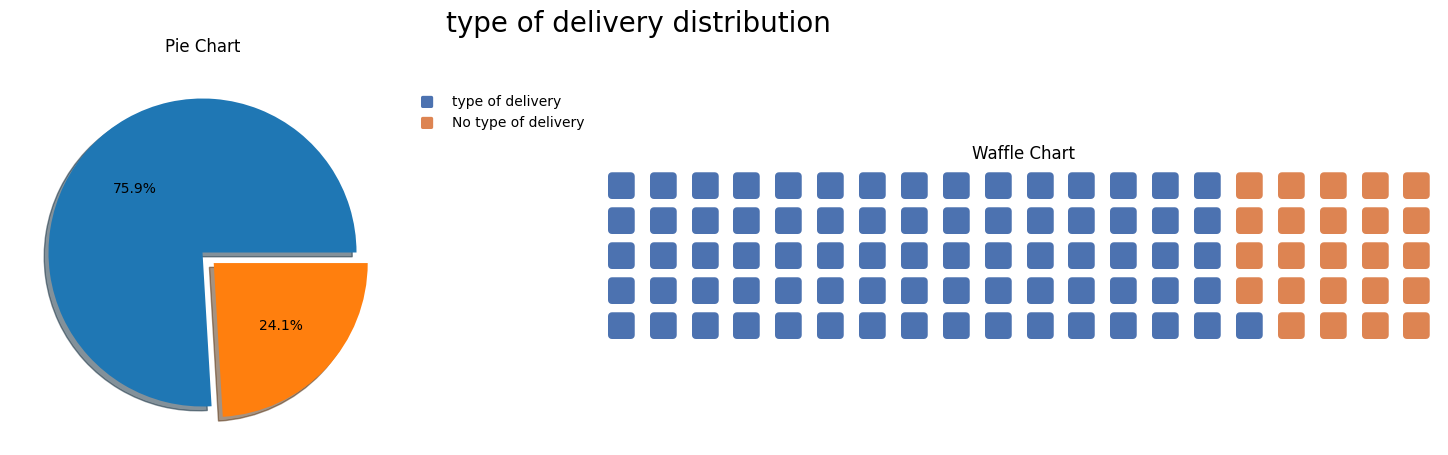

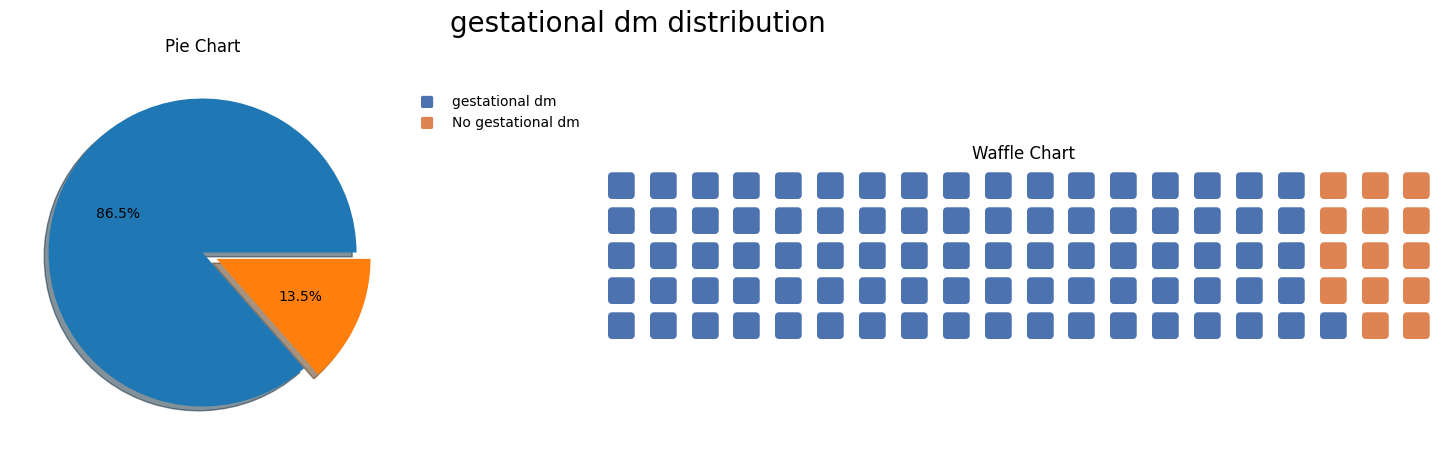

In [ ]:
CATEGORICAL_COLS = ['ethnicity','diabetes mellitus','type of delivery','gestational dm','pregnancies (number)']
CATEGORICAL_COLS_BINARY = ['ethnicity','diabetes mellitus','type of delivery','gestational dm']
CATEGORICAL_COLS_NON_BINARY = ['pregnancies (number)']
for column in CATEGORICAL_COLS_BINARY:
    fig, axs = plt.subplot_mosaic('A..;ABB;A..', figsize = (20,5),gridspec_kw = {'height_ratios': [1, 2,1],'width_ratios': [1.7, 1,1]})
    column_dist = data[column].value_counts(normalize =True)
    # plot the pie chart on the left
    axs['A'].pie(column_dist*100,shadow=True,explode = [0,0.1],autopct='%1.1f%%')
    axs['A'].set_title('Pie Chart')


    # plot the Waffle chart on the right
    colors = ['#4C72B0',"#DD8452"]
    Waffle.make_waffle(
        ax=axs['B'],  # pass axis to make_waffle
        rows=5, 
        values=column_dist*100, 
        colors=['#4C72B0', '#DD8452'],
        legend = {
            'labels': [f'{column}', f'No {column}'], 
            'loc': 'upper left', 
            'bbox_to_anchor': (-0.25, 1.5),
            'frameon': False},

        icons=["square", "square"],
        icon_size=22,
        icon_legend=True,
        )



    axs['B'].set_title('Waffle Chart')
    fig.suptitle(f'{column} distribution', fontsize=20)
    plt.show()

[Text(0, 0, 'Vaginal Birth'), Text(1, 0, 'cesarian section')]

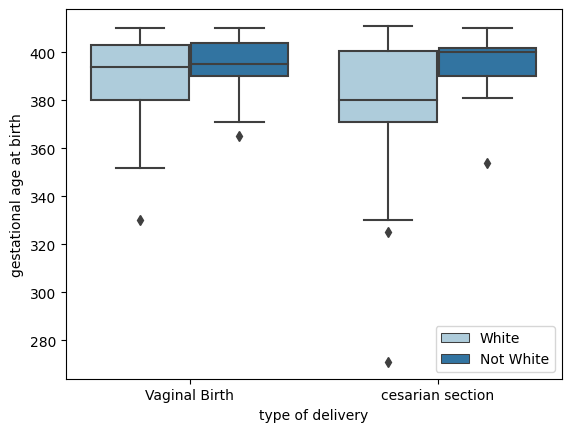

In [ ]:
property = 'gestational age at birth'
ax = sns.boxplot(x=data['type of delivery'] , y= data[property],hue=data.ethnicity)
# Get the handles and labels of the current plot
handles, labels = ax.get_legend_handles_labels()

# Create a legend and set its location
ax.legend(handles, ['White','Not White'], loc='lower right')
ax.set_xticklabels(['Vaginal Birth','cesarian section'])

[Text(0, 0, 'Vaginal Birth'), Text(1, 0, 'cesarian section')]

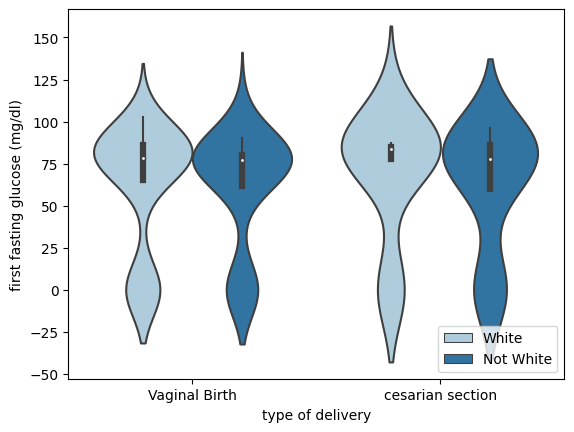

In [ ]:
property = 'first fasting glucose (mg/dl)'
ax = sns.violinplot(x=data['type of delivery'] , y= data[property],hue=data.ethnicity)
# Get the handles and labels of the current plot
handles, labels = ax.get_legend_handles_labels()

# Create a legend and set its location
ax.legend(handles, ['White','Not White'], loc='lower right')
ax.set_xticklabels(['Vaginal Birth','cesarian section'])

In [ ]:
X=data[['child birth weight (g)','bmi pregestational (kg/m)','first fasting glucose (mg/dl)','central armellini fat (mm)','age (years)']]
y = data["gestational dm"]

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
model_params = {
    'SupportVectorMachine': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20]
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [ ]:
model_name = 'random_forest'
clf =  GridSearchCV(model_params[model_name]['model'], model_params[model_name]['params'], cv=5, return_train_score=False)
clf.fit(X, y)
scores = []
scores.append({
    'model': model_name,
    'best_score': clf.best_score_,
    'best_params': clf.best_params_
})

In [ ]:
model_name = 'logistic_regression'
clf =  GridSearchCV(model_params[model_name]['model'], model_params[model_name]['params'], cv=5, return_train_score=False)
clf.fit(X, y)
scores.append({
    'model': model_name,
    'best_score': clf.best_score_,
    'best_params': clf.best_params_
})

In [ ]:
model_name = 'SupportVectorMachine'
clf =  GridSearchCV(model_params[model_name]['model'], model_params[model_name]['params'], cv=5, return_train_score=False)
clf.fit(X, y)
scores.append({
    'model': model_name,
    'best_score': clf.best_score_,
    'best_params': clf.best_params_
})

In [ ]:
Result_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
Result_df

,model,best_score,best_params
0,random_forest,0.857265,{'n_estimators': 5}
1,logistic_regression,0.864957,{'C': 1}
2,SupportVectorMachine,0.864957,{'C': 1}
